# Imports and Downloads

In [1]:
!pip install snntorch --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 2.6 MB/s eta 0:00:00


In [2]:
!pip install eco2ai --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.5.0 requires pandas>=1.5.0, but you have pandas 1.4.3 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.4.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.4.3 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.4.3 which is incompatible.


In [3]:
!pip install torchsummary --quiet

In [4]:
!pip install thop --quiet

In [5]:
import eco2ai

tracker = eco2ai.Tracker(
    project_name="ExercisesClassificationSCNN",
    experiment_description="training SCNN model",
    file_name="SCNNemission.csv"
    )

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


In [6]:
# Import the required libraries.
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F


from torchvision import transforms
from PIL import Image
from snntorch import spikegen
import snntorch.spikeplot as splt
from IPython.display import HTML

import snntorch as snn
from snntorch import surrogate
from snntorch import backprop
from snntorch import functional as SF
from snntorch import utils
from snntorch import spikeplot as splt

  from snntorch import backprop



In [7]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# os.makedirs('/content/WorkoutFitnessVideos')

!unzip /content/drive/MyDrive/Datasets/workoutfitness-video.zip -d /content/WorkoutFitnessVideos

Archive:  /content/drive/MyDrive/Datasets/workoutfitness-video.zip
   creating: /content/WorkoutFitnessVideos/workoutfitness-video/
  inflating: /content/WorkoutFitnessVideos/__MACOSX/._workoutfitness-video  
   creating: /content/WorkoutFitnessVideos/workoutfitness-video/deadlift/
  inflating: /content/WorkoutFitnessVideos/__MACOSX/workoutfitness-video/._deadlift  
   creating: /content/WorkoutFitnessVideos/workoutfitness-video/hammer curl/
  inflating: /content/WorkoutFitnessVideos/__MACOSX/workoutfitness-video/._hammer curl  
  inflating: /content/WorkoutFitnessVideos/workoutfitness-video/.DS_Store  
  inflating: /content/WorkoutFitnessVideos/__MACOSX/workoutfitness-video/._.DS_Store  
   creating: /content/WorkoutFitnessVideos/workoutfitness-video/tricep Pushdown/
  inflating: /content/WorkoutFitnessVideos/__MACOSX/workoutfitness-video/._tricep Pushdown  
   creating: /content/WorkoutFitnessVideos/workoutfitness-video/squat/
  inflating: /content/WorkoutFitnessVideos/__MACOSX/worko

In [ ]:
os.remove("/content/WorkoutFitnessVideos/workoutfitness-video/.DS_Store")
os.listdir("/content/WorkoutFitnessVideos/workoutfitness-video")

['leg raises',
 'lat pulldown',
 'deadlift',
 'russian twist',
 'tricep dips',
 'leg extension',
 'bench press',
 'hip thrust',
 'pull Up',
 'chest fly machine',
 'incline bench press',
 'push-up',
 'tricep Pushdown',
 'shoulder press',
 'hammer curl',
 'lateral raise',
 'squat',
 'barbell biceps curl']

In [ ]:
DATASET_DIR = '/content/WorkoutFitnessVideos/workoutfitness-video'

classes_list = os.listdir(DATASET_DIR)

# Rename directories by replacing spaces with underscores.
for class_name in classes_list:
    old_path = os.path.join(DATASET_DIR, class_name)
    new_name = class_name.replace(" ", "_")
    new_path = os.path.join(DATASET_DIR, new_name)
    os.rename(old_path, new_path)

# Display the updated classes list.
print("Updated classes list:")
print(os.listdir(DATASET_DIR))

Updated classes list:
['leg_extension', 'deadlift', 'bench_press', 'barbell_biceps_curl', 'russian_twist', 'incline_bench_press', 'push-up', 'tricep_Pushdown', 'pull_Up', 'chest_fly_machine', 'hammer_curl', 'lateral_raise', 'hip_thrust', 'leg_raises', 'shoulder_press', 'squat', 'lat_pulldown', 'tricep_dips']


# Visualization of Data

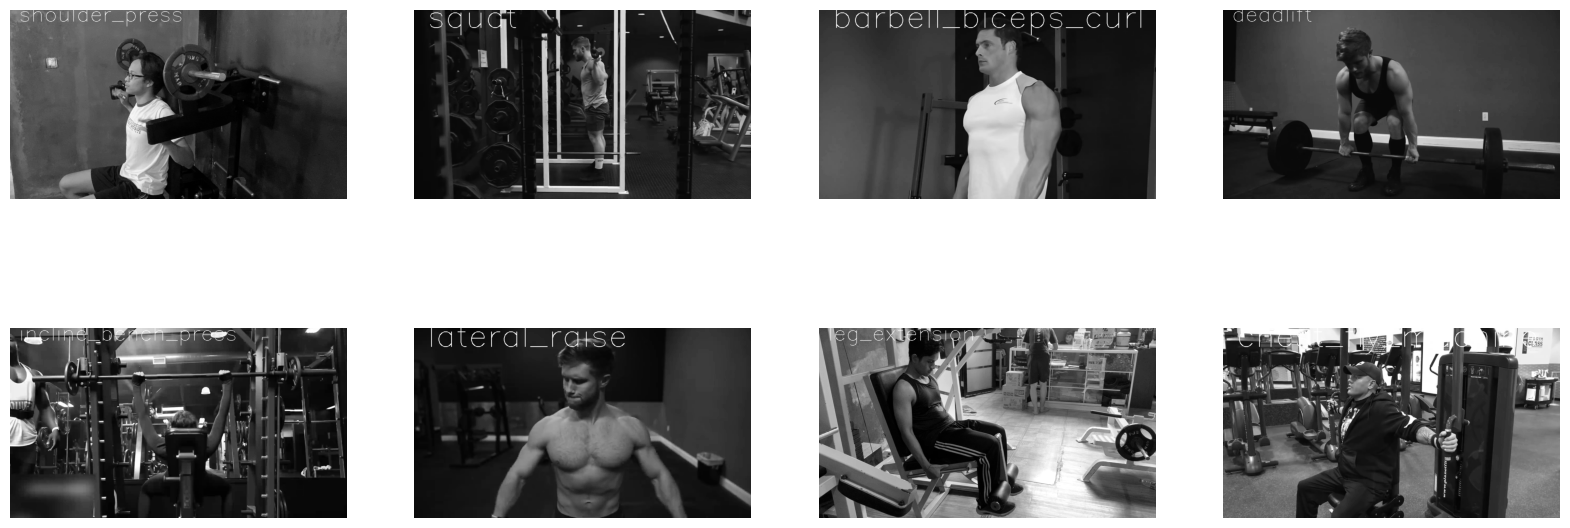

In [ ]:
plt.figure(figsize = (20, 20)) # Matplot figure

# Get the names of the classes/categories inside the UCF50
all_classes_names = os.listdir('/content/WorkoutFitnessVideos/workoutfitness-video')

# Getting a random list of 20 random values between 0-22
random_range = random.sample(range(len(all_classes_names)), 8)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

  # Retrieve a Class Name using the Random Index.
  selected_class_Name = all_classes_names[random_index]

  # Retrieve the list of all the video files present in the randomly selected Class Directory.
  video_files_names_list = os.listdir(f'/content/WorkoutFitnessVideos/workoutfitness-video/{selected_class_Name}')

  if not video_files_names_list:
    print(f'No video files found in {selected_class_Name}')
    continue

  # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
  selected_video_file_name = random.choice(video_files_names_list)

  # Initialize a VideoCapture object to read from the video File.
  video_reader = cv2.VideoCapture(f'/content/WorkoutFitnessVideos/workoutfitness-video/{selected_class_Name}/{selected_video_file_name}')

  # Read the first frame of the video file.
  _, bgr_frame = video_reader.read()

  # Check if bgr_frame is None
  if bgr_frame is None:
    print("Error: bgr_frame is None. Check if the video file is accessible and not corrupted.")
    exit()

  elif not video_reader.isOpened():
    print("Error: OpenCV could not open the video file. Check if the file is in a readable format.")
    exit()

  else:
    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor (bgr_frame, cv2. COLOR_BGR2RGB)

  # Release the VideoCapture object.
  video_reader.release()

  # Write the class name on the grayscale frame.
  cv2.putText(rgb_frame, selected_class_Name, (50, 70), cv2.FONT_HERSHEY_SIMPLEX, 4, 255, 2)


  # Display the frame.
  plt.subplot(5, 4, counter)
  plt.imshow(rgb_frame, cmap='rgb')
  plt.axis('off')

plt.show()


In [ ]:
# Define transformation for resizing and normalizing the frame
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize frame to 28x28
    transforms.ToTensor(), # Convert frame to tensor
    transforms.Normalize((0,), (1,))  # Normalize frame
])

In [8]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 128, 128

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 50

batch_size = 16

# Specify the directory containing the UCF50 dataset.
DATASET_DIR = "/content/WorkoutFitnessVideos/workoutfitness-video"

# the list containing the names of the classes used for training
# classes_list = [class_name for class_name in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, class_name))]

classes_list = ["barbell_biceps_curl", "bench_press", "lat_pulldown", "tricep_Pushdown", "leg_extension", "incline_bench_press", "push-up", "squat", "pull_Up", "lateral_raise"]

# print(classes_list)

# Function to Extract, Resize & Normalize Frames

We will create a function **`frames_extraction()`** that will create a list containing the resized and normalized frames of a video whose path is passed to it as an argument. The function will read the video file frame by frame, although not all frames are added to the list as we will only need an evenly distributed sequence length of frames.

In [ ]:
from torchvision import transforms
from PIL import Image

def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after applying the specified transformation.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
        transform: The transformation function to be applied to each frame.
    Returns:
        frames_list: A list containing the transformed frames of the video.
    '''

    # Declare a list to store transformed video frames.
    frames_list = []

    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
        # print("frame_counter: ", frame_counter)

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video.
        success, frame = video_reader.read()

        # Check if Video frame is not successfully read then break the loop
        if not success:
          print("not success")
          break

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Convert the frame from NumPy array to PIL Image
        pil_image = Image.fromarray(frame)

        # Resize and normalize the frame using the provided transformation.
        transformed_frame = transform(pil_image)

        # Append the transformed frame into the frames list
        frames_list.append(transformed_frame)

    # Release the VideoCapture object.
    video_reader.release()

    # Return the transformed frames list.
    return frames_list

# Function for Dataset Creation

Now we will create a function **`create_dataset()`** that will iterate through all the classes specified in the **`CLASSES_LIST`** constant and will call the function  **`frame_extraction()`** on every video file of the selected classes and return the frames (**`features`**), class index ( **`labels`**), and video file path (**`video_files_paths`**).

In [ ]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []

    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):

        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')

        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        # Iterate through all the files present in the files list.
        for file_name in files_list:

            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)

    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

Now we will utilize the function create_dataset() created above to extract the data of the selected classes and create the required dataset.

In [ ]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: barbell_biceps_curl
not success
Extracting Data of Class: bench_press
not success
not success
not success
not success
not success
Extracting Data of Class: lat_pulldown
not success
not success
Extracting Data of Class: tricep_Pushdown
not success
not success
not success
Extracting Data of Class: leg_extension
not success
Extracting Data of Class: incline_bench_press
not success
not success
not success
not success
Extracting Data of Class: push-up
not success
Extracting Data of Class: squat
not success
not success
Extracting Data of Class: pull_Up
not success
not success
not success
not success
not success
Extracting Data of Class: lateral_raise
not success


In [ ]:
import pickle

# Save variables to disk
with open('/content/drive/MyDrive/Datasets/allExcersies128x128.pkl', 'wb') as f:
    pickle.dump((features, labels, video_files_paths), f)

In [9]:
import pickle

# Load variables from disk
with open('/content/drive/MyDrive/21_GP24_Karim_EventImagingSNNs/Datasets/allExcersies128x128.pkl', 'rb') as f:
    features, labels, video_files_paths = pickle.load(f)

Creating a 2 different datasets one for the train and one for the test data

In [10]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create datasets and dataloaders
dataset = CustomDataset(features, labels)
dataset_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# for data, labels in iter(dataset_loader):
#   print(data.size())
#   print(labels.size())

# # Validation dataset and loader
# val_dataset = CustomDataset(features_val, labels_val)
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# for data, labels in iter(val_loader):
#   print(data.size())
#   print(labels.size())


In [11]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Converting Frames into Rate encoded spikes

In [12]:
labels_tensor = torch.from_numpy(labels)
print("labels_tensor.shape: ", labels_tensor.shape)

labels_tensor.shape:  torch.Size([236])


In [13]:
# Initialize an empty list to store the rate-encoded data
spike_data = []

# Iterate over minibatches in the train_loader
for data, targets in dataset_loader:
    # Permute dimensions to match the expected format for rate encoding
    data = data.permute(1, 0, 2, 3, 4)
    print(data.shape)
    print(targets.shape)

    # Apply rate encoding to the minibatch
    spike_data_batch = spikegen.rate(data, time_var_input=True)

    # Append the rate-encoded minibatch to the list
    spike_data.append(spike_data_batch)

# Stack the rate-encoded minibatches along the first dimension to create the final tensor
spike_data = torch.cat(spike_data, dim=1)

# Display the shape of the rate-encoded data
print(spike_data.shape)


torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 16, 3, 128, 128])
torch.Size([16])
torch.Size([50, 12, 3, 128, 128])
torch.Size([12])
torch.Size([50, 236, 3, 128, 128])


In [ ]:
import pickle

# Save variables to disk
with open('/content/drive/MyDrive/21_GP24_Karim_EventImagingSNNs/Datasets/all_exer_spike_data_num_steps15.pkl', 'wb') as f:
    pickle.dump((spike_data, labels_tensor), f)

In [15]:
import pickle

# Load variables from disk
with open('/content/drive/MyDrive/21_GP24_Karim_EventImagingSNNs/Datasets/all_exer_spike_data_num_steps15.pkl', 'rb') as f:
    spike_data, labels_tensor = pickle.load(f)


# Visualization of Rate Encoded Data

In [ ]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

In [ ]:
spike_data_sample = train_spike_data[:, 7, 2]
# spike_data_sample_permuted = spike_data_sample.permute(1, 2, 0)
print(spike_data_sample.size())

torch.Size([50, 128, 128])


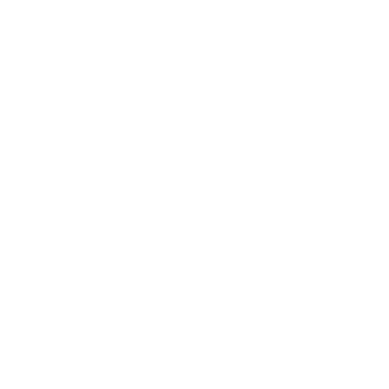

In [ ]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

HTML(anim.to_html5_video())

Saving the gif

In [ ]:
import os

# Generate the HTML content
html_content = anim.to_html5_video()

# Specify the directory where you want to save the HTML file
directory_path = "/content/drive/MyDrive/Datasets"

# Ensure the directory exists, create it if it doesn't
os.makedirs(directory_path, exist_ok=True)

# Specify the filename for the HTML file
filename = "legextensionAnimati.html"

# Construct the full file path
html_file_path = os.path.join(directory_path, filename)

# Write the HTML content to the file
with open(html_file_path, "w") as html_file:
    html_file.write(html_content)

print("HTML animation saved successfully to:", html_file_path)

HTML animation saved successfully to: /content/drive/MyDrive/Datasets/legextensionAnimati.html


# Spike Encoded dataset creation

Changin the shape of the tensor to be able to apply dataloader

In [14]:
# Original train and val tensor shape = torch.Size([50, 16, 3, 128, 128])
spike_data = spike_data.permute(1, 0, 2, 3, 4)
# val_spike_data = val_spike_data.permute(1, 0, 2, 3, 4)
print("spike_data permuted: ", spike_data.shape)
# print("val_spike_data permuted: ", val_spike_data.shape)

spike_data permuted:  torch.Size([236, 50, 3, 128, 128])


In [15]:
from torch.utils.data import Dataset, DataLoader

class CustomDatasetForSpikeData(Dataset):
    def __init__(self, spike_data, labels_tensor):
        self.spike_data = spike_data
        self.labels_tensor = labels_tensor

    def __len__(self):
        return len(self.labels_tensor)  # Return the total number of samples

    def __getitem__(self, idx):
        # Calculate the index of the sequence based on the batch size and total samples
        batch_size = self.spike_data.shape[0]
        num_samples = len(self.labels_tensor)
        sequence_index = idx % batch_size
        sample_index = idx % num_samples

        # Return the corresponding spike data and label
        return self.spike_data[sequence_index], self.labels_tensor[sample_index]

# Create datasets and dataloaders
train_dataset = CustomDatasetForSpikeData(spike_data, labels_tensor)

# Main Model

In [25]:
# neuron and simulation parameters
spike_grad = surrogate.atan()
beta = 0.9

# Define your network architecture with dropout and batch normalization layers
net = nn.Sequential(
                    nn.Conv2d(3, 32, 5, padding="same"),
                    nn.BatchNorm2d(32),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(32, 64, 5, padding="same"),
                    nn.BatchNorm2d(64),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(64, 128, 5, padding="same"),
                    nn.BatchNorm2d(128),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(128, 256, 5, padding="same"),
                    nn.BatchNorm2d(256),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(256, 512, 5, padding="same"),
                    nn.BatchNorm2d(512),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Flatten(),
                    nn.Linear(512*4*4, 1024),
                    nn.LeakyReLU(),
                    nn.Linear(1024, 128),
                    nn.LeakyReLU(),
                    nn.Linear(128, len(classes_list)),
                    nn.LeakyReLU(),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True, output=True)
).to(device)

In [17]:
from torchsummary import summary

summary(net, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]           2,432
       BatchNorm2d-2         [-1, 32, 128, 128]              64
         MaxPool2d-3           [-1, 32, 64, 64]               0
             Leaky-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          51,264
       BatchNorm2d-6           [-1, 64, 64, 64]             128
         MaxPool2d-7           [-1, 64, 32, 32]               0
             Leaky-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]         204,928
      BatchNorm2d-10          [-1, 128, 32, 32]             256
        MaxPool2d-11          [-1, 128, 16, 16]               0
            Leaky-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         819,456
      BatchNorm2d-14          [-1, 256,

In [ ]:
import torch
from thop import profile

# Input tensor
inputs = torch.randn(16, 3, 128, 128).to(device)

# Use thop.profile to profile the model and compute FLOPs
flops, params = profile(net, inputs=(inputs,))

print(f"FLOPs: {flops}, Parameters: {params}")


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_relu() for <class 'torch.nn.modules.activation.LeakyReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
FLOPs: 14252265472.0, Parameters: 12879498.0


In [26]:
# this time, we won't return membrane as we don't need it

def forward_pass(net, data):
  spk_rec = []
  utils.reset(net)  # resets hidden states for all LIF neurons in net

  for step in range(data.size(0)):  # data.size(0) = number of time steps
      spk_out, mem_out = net(data[step])
      spk_rec.append(spk_out)

  return torch.stack(spk_rec)


In [27]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.999))
loss_fn = SF.loss.mse_count_loss(correct_rate=0.8, incorrect_rate=0.2)

## Run 1 (average run)

In [ ]:
tracker.start()

In [ ]:
from sklearn.model_selection import KFold
import torch

num_iters = 50
loss_hist = []
acc_hist = []

num_epochs_per_fold = [60, 40, 30, 20, 10]

# Define the number of folds for cross-validation
k_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=k_folds, shuffle=True)

# Initialize lists to store accuracy for each fold
fold_accuracies = []

all_preds = []
all_targets = []

# Iterate over each fold
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold_idx + 1}/{k_folds}")

    num_epochs = num_epochs_per_fold[fold_idx]

    # Split the dataset into training and validation sets for this fold
    train_subset = torch.utils.data.Subset(train_dataset, train_idx)
    val_subset = torch.utils.data.Subset(train_dataset, val_idx)

    # Create data loaders for training and validation
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Reset the network parameters for each fold
    utils.reset(net)

    # Training loop for this fold
    for epoch in range(num_epochs):
        for i, (data, targets) in enumerate(train_loader):
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            net.train()  # Switch to training mode
            spk_rec = forward_pass(net, data)

            targets = targets.long()
            loss_val = loss_fn(spk_rec, targets)

            loss_hist.append(loss_val.item())

            # Gradient calculation + weight update
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            # Print training progress
            print(f"Fold {fold_idx + 1}/{k_folds}, Epoch {epoch + 1}, Iteration {i + 1}/{len(train_loader)}, Train Loss: {loss_val.item():.4f}")

    # Evaluate the model on the validation set for this fold
    net.eval()  # Switch to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in val_loader:
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            spk_rec = forward_pass(net, data)
            targets = targets.long()

            preds = torch.argmax(torch.sum(spk_rec, dim=0), dim=1)

            # Append predictions and true labels for this fold
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

            # Calculate accuracy
            acc = SF.accuracy_rate(spk_rec, targets)
            acc_hist.append(acc)
            correct += acc * len(targets)
            total += len(targets)

    # Calculate accuracy for this fold
    fold_accuracy = correct / total
    fold_accuracies.append(fold_accuracy)
    print(f"Validation Accuracy for Fold {fold_idx + 1}/{k_folds}: {fold_accuracy * 100:.2f}%")

# Calculate overall cross-validation accuracy
avg_accuracy = sum(fold_accuracies) / k_folds
print(f"Average Cross-Validation Accuracy: {avg_accuracy * 100:.2f}%")


Fold 1/5
Fold 1/5, Epoch 1, Iteration 1/12, Train Loss: 4.8955
Fold 1/5, Epoch 1, Iteration 2/12, Train Loss: 7.4131
Fold 1/5, Epoch 1, Iteration 3/12, Train Loss: 7.6274
Fold 1/5, Epoch 1, Iteration 4/12, Train Loss: 6.4045
Fold 1/5, Epoch 1, Iteration 5/12, Train Loss: 6.2112
Fold 1/5, Epoch 1, Iteration 6/12, Train Loss: 6.0473
Fold 1/5, Epoch 1, Iteration 7/12, Train Loss: 6.6040
Fold 1/5, Epoch 1, Iteration 8/12, Train Loss: 5.6677
Fold 1/5, Epoch 1, Iteration 9/12, Train Loss: 5.9237
Fold 1/5, Epoch 1, Iteration 10/12, Train Loss: 5.6117
Fold 1/5, Epoch 1, Iteration 11/12, Train Loss: 5.1804
Fold 1/5, Epoch 1, Iteration 12/12, Train Loss: 5.7517
Fold 1/5, Epoch 2, Iteration 1/12, Train Loss: 4.3054
Fold 1/5, Epoch 2, Iteration 2/12, Train Loss: 3.6783
Fold 1/5, Epoch 2, Iteration 3/12, Train Loss: 3.3676
Fold 1/5, Epoch 2, Iteration 4/12, Train Loss: 3.0759
Fold 1/5, Epoch 2, Iteration 5/12, Train Loss: 3.2759
Fold 1/5, Epoch 2, Iteration 6/12, Train Loss: 3.0327
Fold 1/5, Epoch 

In [ ]:
tracker.stop()

In [ ]:
# Save FLOPs and Parameters to a text file
with open("flops_params.txt", "w") as file:
    file.write(f"FLOPs: {flops}, Parameters: {params}")


## Run 2 (Worst run)

In [20]:
tracker.start()

In [21]:
from sklearn.model_selection import KFold
import torch

num_iters = 50
loss_hist = []
acc_hist = []

num_epochs_per_fold = [50, 50, 40, 20, 10]

# Define the number of folds for cross-validation
k_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=k_folds, shuffle=True)

# Initialize lists to store accuracy for each fold
fold_accuracies = []

all_preds = []
all_targets = []

def reset_model(net):
    for layer in net.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

# Iterate over each fold
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold_idx + 1}/{k_folds}")

    num_epochs = num_epochs_per_fold[fold_idx]

    # Split the dataset into training and validation sets for this fold
    train_subset = torch.utils.data.Subset(train_dataset, train_idx)
    val_subset = torch.utils.data.Subset(train_dataset, val_idx)

    # Create data loaders for training and validation
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Reset the network parameters for each fold
    reset_model(net)

    # Training loop for this fold
    for epoch in range(num_epochs):
        for i, (data, targets) in enumerate(train_loader):
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            net.train()  # Switch to training mode
            spk_rec = forward_pass(net, data)

            targets = targets.long()
            loss_val = loss_fn(spk_rec, targets)

            loss_hist.append(loss_val.item())

            # Gradient calculation + weight update
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            # Print training progress
            print(f"Fold {fold_idx + 1}/{k_folds}, Epoch {epoch + 1}, Iteration {i + 1}/{len(train_loader)}, Train Loss: {loss_val.item():.4f}")

    # Evaluate the model on the validation set for this fold
    net.eval()  # Switch to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in val_loader:
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            spk_rec = forward_pass(net, data)
            targets = targets.long()

            preds = torch.argmax(torch.sum(spk_rec, dim=0), dim=1)

            # Append predictions and true labels for this fold
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

            # Calculate accuracy
            acc = SF.accuracy_rate(spk_rec, targets)
            acc_hist.append(acc)
            correct += acc * len(targets)
            total += len(targets)

    # Calculate accuracy for this fold
    fold_accuracy = correct / total
    fold_accuracies.append(fold_accuracy)
    print(f"Validation Accuracy for Fold {fold_idx + 1}/{k_folds}: {fold_accuracy * 100:.2f}%")

# Calculate overall cross-validation accuracy
avg_accuracy = sum(fold_accuracies) / k_folds
print(f"Average Cross-Validation Accuracy: {avg_accuracy * 100:.2f}%")


Fold 1/5
Fold 1/5, Epoch 1, Iteration 1/12, Train Loss: 4.8327
Fold 1/5, Epoch 1, Iteration 2/12, Train Loss: 8.1650
Fold 1/5, Epoch 1, Iteration 3/12, Train Loss: 3.1752
Fold 1/5, Epoch 1, Iteration 4/12, Train Loss: 3.0699
Fold 1/5, Epoch 1, Iteration 5/12, Train Loss: 3.1064
Fold 1/5, Epoch 1, Iteration 6/12, Train Loss: 2.9362
Fold 1/5, Epoch 1, Iteration 7/12, Train Loss: 2.4745
Fold 1/5, Epoch 1, Iteration 8/12, Train Loss: 2.2528
Fold 1/5, Epoch 1, Iteration 9/12, Train Loss: 2.3279
Fold 1/5, Epoch 1, Iteration 10/12, Train Loss: 2.6575
Fold 1/5, Epoch 1, Iteration 11/12, Train Loss: 2.7440
Fold 1/5, Epoch 1, Iteration 12/12, Train Loss: 2.2273
Fold 1/5, Epoch 2, Iteration 1/12, Train Loss: 2.2043
Fold 1/5, Epoch 2, Iteration 2/12, Train Loss: 2.3709
Fold 1/5, Epoch 2, Iteration 3/12, Train Loss: 2.5114
Fold 1/5, Epoch 2, Iteration 4/12, Train Loss: 2.3724
Fold 1/5, Epoch 2, Iteration 5/12, Train Loss: 2.4673
Fold 1/5, Epoch 2, Iteration 6/12, Train Loss: 2.2156
Fold 1/5, Epoch 

In [22]:
tracker.stop()

## Run 3 (Best Run)

In [28]:
from sklearn.model_selection import KFold
import torch

num_iters = 50
loss_hist = []
acc_hist = []

num_epochs_per_fold = [70, 40, 20, 20, 10]

# Define the number of folds for cross-validation
k_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=k_folds, shuffle=True)

# Initialize lists to store accuracy for each fold
fold_accuracies = []

all_preds = []
all_targets = []

# Iterate over each fold
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold_idx + 1}/{k_folds}")

    num_epochs = num_epochs_per_fold[fold_idx]

    # Split the dataset into training and validation sets for this fold
    train_subset = torch.utils.data.Subset(train_dataset, train_idx)
    val_subset = torch.utils.data.Subset(train_dataset, val_idx)

    # Create data loaders for training and validation
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Reset the network parameters for each fold
    utils.reset(net)

    # Training loop for this fold
    for epoch in range(num_epochs):
        for i, (data, targets) in enumerate(train_loader):
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            net.train()  # Switch to training mode
            spk_rec = forward_pass(net, data)

            targets = targets.long()
            loss_val = loss_fn(spk_rec, targets)

            loss_hist.append(loss_val.item())

            # Gradient calculation + weight update
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            # Print training progress
            print(f"Fold {fold_idx + 1}/{k_folds}, Epoch {epoch + 1}, Iteration {i + 1}/{len(train_loader)}, Train Loss: {loss_val.item():.4f}")

    # Evaluate the model on the validation set for this fold
    net.eval()  # Switch to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in val_loader:
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            spk_rec = forward_pass(net, data)
            targets = targets.long()

            preds = torch.argmax(torch.sum(spk_rec, dim=0), dim=1)

            # Append predictions and true labels for this fold
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

            # Calculate accuracy
            acc = SF.accuracy_rate(spk_rec, targets)
            acc_hist.append(acc)
            correct += acc * len(targets)
            total += len(targets)

    # Calculate accuracy for this fold
    fold_accuracy = correct / total
    fold_accuracies.append(fold_accuracy)
    print(f"Validation Accuracy for Fold {fold_idx + 1}/{k_folds}: {fold_accuracy * 100:.2f}%")

# Calculate overall cross-validation accuracy
avg_accuracy = sum(fold_accuracies) / k_folds
print(f"Average Cross-Validation Accuracy: {avg_accuracy * 100:.2f}%")


Fold 1/5
Fold 1/5, Epoch 1, Iteration 1/12, Train Loss: 4.6340
Fold 1/5, Epoch 1, Iteration 2/12, Train Loss: 9.3889
Fold 1/5, Epoch 1, Iteration 3/12, Train Loss: 3.9810
Fold 1/5, Epoch 1, Iteration 4/12, Train Loss: 2.6604
Fold 1/5, Epoch 1, Iteration 5/12, Train Loss: 2.1892
Fold 1/5, Epoch 1, Iteration 6/12, Train Loss: 2.0070
Fold 1/5, Epoch 1, Iteration 7/12, Train Loss: 2.1686
Fold 1/5, Epoch 1, Iteration 8/12, Train Loss: 1.9132
Fold 1/5, Epoch 1, Iteration 9/12, Train Loss: 1.7019
Fold 1/5, Epoch 1, Iteration 10/12, Train Loss: 1.7342
Fold 1/5, Epoch 1, Iteration 11/12, Train Loss: 1.7270
Fold 1/5, Epoch 1, Iteration 12/12, Train Loss: 1.7787
Fold 1/5, Epoch 2, Iteration 1/12, Train Loss: 1.7644
Fold 1/5, Epoch 2, Iteration 2/12, Train Loss: 1.8913
Fold 1/5, Epoch 2, Iteration 3/12, Train Loss: 1.6696
Fold 1/5, Epoch 2, Iteration 4/12, Train Loss: 1.7336
Fold 1/5, Epoch 2, Iteration 5/12, Train Loss: 1.7156
Fold 1/5, Epoch 2, Iteration 6/12, Train Loss: 1.7686
Fold 1/5, Epoch 

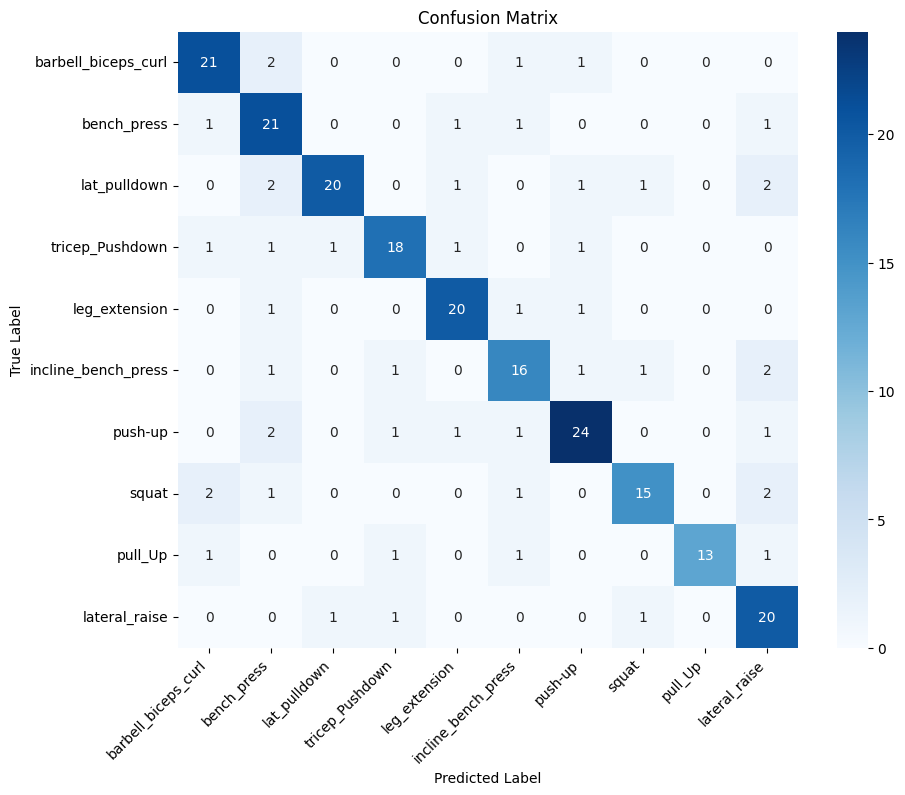

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix using all predictions and true labels
conf_matrix = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes_list, yticklabels=classes_list)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig("SCNNconfusion_matrix.png", bbox_inches='tight')
plt.show()


## Run 4

In [39]:
from sklearn.model_selection import KFold
import torch

num_epochs = 5
num_iters = 50
# loss_hist = []
# acc_hist = []

# Define the number of folds for cross-validation
k_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store accuracy for each fold
fold_accuracies = []

# def reset_model(net):
#     for layer in net.children():
#         if hasattr(layer, 'reset_parameters'):
#             layer.reset_parameters()

# Iterate over each fold
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold_idx + 1}/{k_folds}")

    # Split the dataset into training and validation sets for this fold
    train_subset = torch.utils.data.Subset(train_dataset, train_idx)
    val_subset = torch.utils.data.Subset(train_dataset, val_idx)

    # Create data loaders for training and validation
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)



    # Training loop for this fold
    for epoch in range(num_epochs):
        for i, (data, targets) in enumerate(train_loader):
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            net.train()  # Switch to training mode
            spk_rec = forward_pass(net, data)

            targets = targets.long()
            loss_val = loss_fn(spk_rec, targets)

            # Gradient calculation + weight update
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            # Print training progress
            print(f"Fold {fold_idx + 1}/{k_folds}, Epoch {epoch + 1}, Iteration {i + 1}/{len(train_loader)}, Train Loss: {loss_val.item():.4f}")

    # Evaluate the model on the validation set for this fold
    net.eval()  # Switch to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in val_loader:
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            spk_rec = forward_pass(net, data)
            targets = targets.long()

            # Calculate accuracy
            acc = SF.accuracy_rate(spk_rec, targets)
            correct += acc * len(targets)
            total += len(targets)

    # Calculate accuracy for this fold
    fold_accuracy = correct / total
    fold_accuracies.append(fold_accuracy)
    print(f"Validation Accuracy for Fold {fold_idx + 1}/{k_folds}: {fold_accuracy * 100:.2f}%")

# Calculate overall cross-validation accuracy
avg_accuracy = sum(fold_accuracies) / k_folds
print(f"Average Cross-Validation Accuracy: {avg_accuracy * 100:.2f}%")


Fold 1/5
Fold 1/5, Epoch 1, Iteration 1/12, Train Loss: 4.3403
Fold 1/5, Epoch 1, Iteration 2/12, Train Loss: 13.8620
Fold 1/5, Epoch 1, Iteration 3/12, Train Loss: 13.2303
Fold 1/5, Epoch 1, Iteration 4/12, Train Loss: 12.7705
Fold 1/5, Epoch 1, Iteration 5/12, Train Loss: 12.1053
Fold 1/5, Epoch 1, Iteration 6/12, Train Loss: 11.5372
Fold 1/5, Epoch 1, Iteration 7/12, Train Loss: 11.7529
Fold 1/5, Epoch 1, Iteration 8/12, Train Loss: 12.6485
Fold 1/5, Epoch 1, Iteration 9/12, Train Loss: 10.4379
Fold 1/5, Epoch 1, Iteration 10/12, Train Loss: 11.5495
Fold 1/5, Epoch 1, Iteration 11/12, Train Loss: 11.7784
Fold 1/5, Epoch 1, Iteration 12/12, Train Loss: 11.7675
Fold 1/5, Epoch 2, Iteration 1/12, Train Loss: 12.6895
Fold 1/5, Epoch 2, Iteration 2/12, Train Loss: 11.5719
Fold 1/5, Epoch 2, Iteration 3/12, Train Loss: 12.3076
Fold 1/5, Epoch 2, Iteration 4/12, Train Loss: 11.0108
Fold 1/5, Epoch 2, Iteration 5/12, Train Loss: 12.2140
Fold 1/5, Epoch 2, Iteration 6/12, Train Loss: 10.9471

In [ ]:
num_epochs = 50
num_iters = 50

loss_hist = []
acc_hist = []

# training loop
for epoch in range(num_epochs):
    for i, (data, targets) in enumerate(iter(train_loader)):
        data = data.permute(1, 0, 2, 3, 4)
        data = data.to(device)
        targets = targets.to(device)

        net.train()
        spk_rec = forward_pass(net, data)

        targets = targets.long()
        loss_val = loss_fn(spk_rec, targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        print(f"Epoch {epoch}, Iteration {i} \nTrain Loss: {loss_val.item():.2f}")

        targets.squeeze()

        acc = SF.accuracy_rate(spk_rec, targets)
        acc_hist.append(acc)
        print(f"Accuracy: {acc * 100:.2f}%\n")

        # training loop breaks after 50 iterations
        if i == num_iters:
          break

Epoch 0, Iteration 0 
Train Loss: 0.00
Accuracy: 100.00%

Epoch 0, Iteration 1 
Train Loss: 1.95
Accuracy: 50.00%

Epoch 0, Iteration 2 
Train Loss: 0.03
Accuracy: 100.00%

Epoch 0, Iteration 3 
Train Loss: 0.04
Accuracy: 93.75%

Epoch 0, Iteration 4 
Train Loss: 3.29
Accuracy: 62.50%

Epoch 0, Iteration 5 
Train Loss: 0.09
Accuracy: 93.75%

Epoch 0, Iteration 6 
Train Loss: 0.01
Accuracy: 100.00%

Epoch 0, Iteration 7 
Train Loss: 2.57
Accuracy: 81.25%

Epoch 0, Iteration 8 
Train Loss: 1.54
Accuracy: 93.75%

Epoch 0, Iteration 9 
Train Loss: 3.28
Accuracy: 75.00%

Epoch 0, Iteration 10 
Train Loss: 1.53
Accuracy: 93.75%

Epoch 0, Iteration 11 
Train Loss: 6.86
Accuracy: 66.67%

Epoch 1, Iteration 0 
Train Loss: 1.00
Accuracy: 93.75%

Epoch 1, Iteration 1 
Train Loss: 2.32
Accuracy: 75.00%

Epoch 1, Iteration 2 
Train Loss: 0.48
Accuracy: 87.50%

Epoch 1, Iteration 3 
Train Loss: 0.87
Accuracy: 81.25%

Epoch 1, Iteration 4 
Train Loss: 0.55
Accuracy: 93.75%

Epoch 1, Iteration 5 
Trai

In [ ]:
net.eval()  # Switch to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for data, targets in val_loader:
        data = data.to(device)
        data = data.permute(1, 0, 2, 3, 4)
        targets = targets.to(device)
        spk_rec = forward_pass(net, data)

        targets = targets.long()
        loss_val = loss_fn(spk_rec, targets)

        # No gradient calculation or weight update needed for testing

        # Calculate accuracy
        acc = SF.accuracy_rate(spk_rec, targets)
        correct += acc * len(targets)
        total += len(targets)

# Calculate overall accuracy
test_accuracy = correct / total
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")

Test Set Accuracy: 16.67%


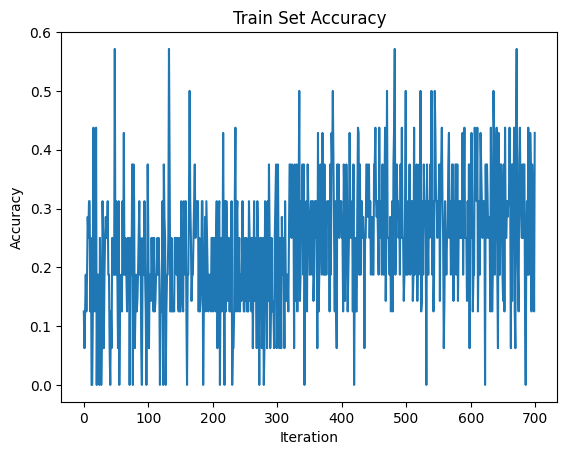

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss

fig = plt.figure(facecolor="w")
plt.plot(acc_hist)
plt.title("Train Set Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import torch
import numpy as np

num_epochs = 30
num_iters = 50
loss_hist = []
acc_hist = []

# Define the number of folds for cross-validation
k_folds = 5

# Initialize the KFold object with shuffling
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store accuracy for each fold
fold_accuracies = []

def reset_model(net):
    for layer in net.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

# Iterate over each fold
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold_idx + 1}/{k_folds}")
    print(f"Training indices: {train_idx[:10]}...")  # Print first 10 indices for brevity
    print(f"Validation indices: {val_idx[:10]}...")

    # num_epochs = num_epochs_per_fold[fold_idx]

    # Split the dataset into training and validation sets for this fold
    train_subset = torch.utils.data.Subset(train_dataset, train_idx)
    val_subset = torch.utils.data.Subset(train_dataset, val_idx)

    # Create data loaders for training and validation
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True, drop_last=False)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False, drop_last=False)

    # Reset the network parameters for each fold
    net.apply(reset_model)

    # Training loop for this fold
    for epoch in range(num_epochs):
        for i, (data, targets) in enumerate(train_loader):
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            net.train()  # Switch to training mode
            spk_rec = forward_pass(net, data)

            targets = targets.long()
            loss_val = loss_fn(spk_rec, targets)

            # Gradient calculation + weight update
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            # Store loss history for future plotting
            loss_hist.append(loss_val.item())

            # Print training progress
            print(f"Fold {fold_idx + 1}/{k_folds}, Epoch {epoch + 1}, Iteration {i + 1}/{len(train_loader)}, Train Loss: {loss_val.item():.4f}")

    # Evaluate the model on the validation set for this fold
    net.eval()  # Switch to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in val_loader:
            data = data.permute(1, 0, 2, 3, 4).to(device)
            targets = targets.to(device)

            spk_rec = forward_pass(net, data)
            targets = targets.long()

            # Calculate accuracy
            acc = SF.accuracy_rate(spk_rec, targets)
            correct += acc * len(targets)
            total += len(targets)

    # Calculate accuracy for this fold
    fold_accuracy = correct / total
    fold_accuracies.append(fold_accuracy)
    print(f"Validation Accuracy for Fold {fold_idx + 1}/{k_folds}: {fold_accuracy * 100:.2f}%")

    break

# Calculate overall cross-validation accuracy
avg_accuracy = np.mean(fold_accuracies)
print(f"Average Cross-Validation Accuracy: {avg_accuracy * 100:.2f}%")


Fold 1/5
Training indices: [ 0  1  2  3  4  5  6  7  8 11]...
Validation indices: [ 9 10 15 16 18 19 24 25 30 45]...
Fold 1/5, Epoch 1, Iteration 1/12, Train Loss: 5.1310
Fold 1/5, Epoch 1, Iteration 2/12, Train Loss: 8.9327
Fold 1/5, Epoch 1, Iteration 3/12, Train Loss: 9.1886
Fold 1/5, Epoch 1, Iteration 4/12, Train Loss: 9.2570
Fold 1/5, Epoch 1, Iteration 5/12, Train Loss: 10.0676
Fold 1/5, Epoch 1, Iteration 6/12, Train Loss: 9.2714
Fold 1/5, Epoch 1, Iteration 7/12, Train Loss: 9.0044
Fold 1/5, Epoch 1, Iteration 8/12, Train Loss: 7.9619
Fold 1/5, Epoch 1, Iteration 9/12, Train Loss: 8.6757
Fold 1/5, Epoch 1, Iteration 10/12, Train Loss: 8.3974
Fold 1/5, Epoch 1, Iteration 11/12, Train Loss: 9.7414
Fold 1/5, Epoch 1, Iteration 12/12, Train Loss: 8.5638
Fold 1/5, Epoch 2, Iteration 1/12, Train Loss: 8.8829
Fold 1/5, Epoch 2, Iteration 2/12, Train Loss: 8.8652
Fold 1/5, Epoch 2, Iteration 3/12, Train Loss: 9.4348
Fold 1/5, Epoch 2, Iteration 4/12, Train Loss: 8.8910
Fold 1/5, Epoch

In [ ]:
num_epochs = 50
num_iters = 50

loss_hist = []
acc_hist = []

# training loop
for epoch in range(num_epochs):
    for i, (data, targets) in enumerate(iter(train_loader)):
        data = data.permute(1, 0, 2, 3, 4)
        data = data.to(device)
        targets = targets.to(device)

        net.train()
        spk_rec = forward_pass(net, data)

        targets = targets.long()
        loss_val = loss_fn(spk_rec, targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        print(f"Epoch {epoch}, Iteration {i} \nTrain Loss: {loss_val.item():.2f}")

        targets.squeeze()

        acc = SF.accuracy_rate(spk_rec, targets)
        acc_hist.append(acc)
        print(f"Accuracy: {acc * 100:.2f}%\n")

        # training loop breaks after 50 iterations
        if i == num_iters:
          break

Epoch 0, Iteration 0 
Train Loss: 5.06
Accuracy: 12.50%

Epoch 0, Iteration 1 
Train Loss: 10.42
Accuracy: 0.00%

Epoch 0, Iteration 2 
Train Loss: 12.57
Accuracy: 6.25%

Epoch 0, Iteration 3 
Train Loss: 10.24
Accuracy: 0.00%

Epoch 0, Iteration 4 
Train Loss: 8.93
Accuracy: 12.50%

Epoch 0, Iteration 5 
Train Loss: 10.64
Accuracy: 6.25%

Epoch 0, Iteration 6 
Train Loss: 9.38
Accuracy: 12.50%

Epoch 0, Iteration 7 
Train Loss: 9.50
Accuracy: 18.75%

Epoch 0, Iteration 8 
Train Loss: 10.03
Accuracy: 6.25%

Epoch 0, Iteration 9 
Train Loss: 9.97
Accuracy: 12.50%

Epoch 0, Iteration 10 
Train Loss: 9.23
Accuracy: 18.75%

Epoch 0, Iteration 11 
Train Loss: 9.51
Accuracy: 8.33%

Epoch 1, Iteration 0 
Train Loss: 9.65
Accuracy: 6.25%

Epoch 1, Iteration 1 
Train Loss: 9.44
Accuracy: 0.00%

Epoch 1, Iteration 2 
Train Loss: 9.40
Accuracy: 6.25%

Epoch 1, Iteration 3 
Train Loss: 9.36
Accuracy: 12.50%

Epoch 1, Iteration 4 
Train Loss: 9.57
Accuracy: 12.50%

Epoch 1, Iteration 5 
Train Loss:

In [ ]:
net.eval()  # Switch to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for data, targets in val_loader:
        data = data.to(device)
        data = data.permute(1, 0, 2, 3, 4)
        targets = targets.to(device)
        spk_rec = forward_pass(net, data)

        targets = targets.long()
        loss_val = loss_fn(spk_rec, targets)

        # No gradient calculation or weight update needed for testing

        # Calculate accuracy
        acc = SF.accuracy_rate(spk_rec, targets)
        correct += acc * len(targets)
        total += len(targets)

# Calculate overall accuracy
test_accuracy = correct / total
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")

Test Set Accuracy: 10.42%


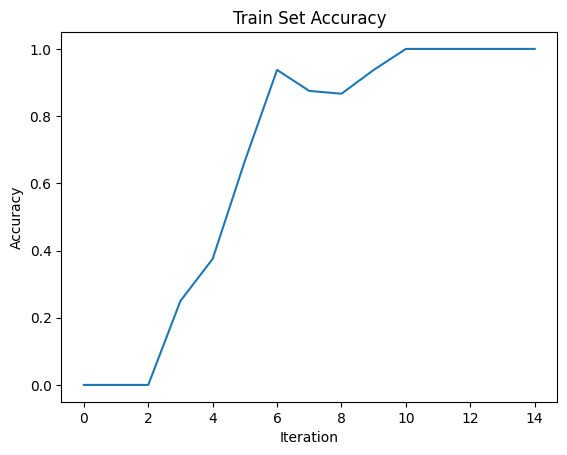

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
fig = plt.figure(facecolor="w")
plt.plot(acc_hist)
plt.title("Train Set Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

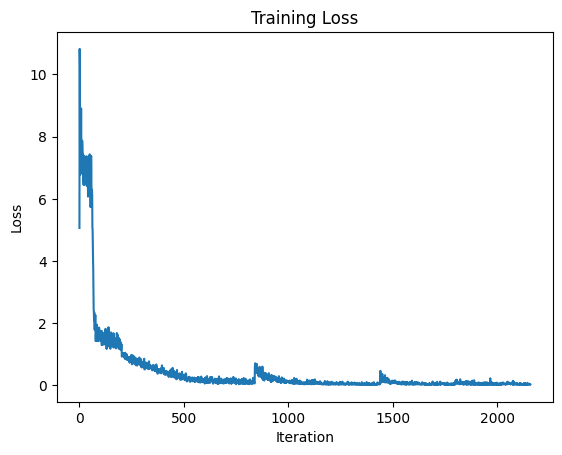

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(facecolor="w")
plt.plot(loss_hist)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


# Model 2

In [ ]:
# neuron and simulation parameters
spike_grad = surrogate.atan()
beta = 0.9

# Define your network architecture with dropout and batch normalization layers
net = nn.Sequential(
                    nn.Conv2d(3, 32, 5, padding="same"),
                    nn.BatchNorm2d(32),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(32, 64, 5, padding="same"),
                    nn.BatchNorm2d(64),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(64, 128, 5, padding="same"),
                    nn.BatchNorm2d(128),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(128, 256, 5, padding="same"),
                    nn.BatchNorm2d(256),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(256, 512, 5, padding="same"),
                    nn.BatchNorm2d(512),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Flatten(),
                    nn.Linear(512*4*4, 256),
                    nn.LeakyReLU(),
                    nn.Dropout(0.1),
                    nn.Linear(256, len(classes_list)),
                    nn.LeakyReLU(),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True, output=True)
).to(device)


In [ ]:
from torchsummary import summary

summary(net, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]           2,432
       BatchNorm2d-2         [-1, 32, 128, 128]              64
         MaxPool2d-3           [-1, 32, 64, 64]               0
             Leaky-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          51,264
       BatchNorm2d-6           [-1, 64, 64, 64]             128
         MaxPool2d-7           [-1, 64, 32, 32]               0
             Leaky-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]         204,928
      BatchNorm2d-10          [-1, 128, 32, 32]             256
        MaxPool2d-11          [-1, 128, 16, 16]               0
            Leaky-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         819,456
      BatchNorm2d-14          [-1, 256,

# Model 3



In [ ]:
# neuron and simulation parameters
spike_grad = surrogate.atan()
beta = 0.9

# Define your network architecture with dropout and batch normalization layers
net = nn.Sequential(
                    nn.Conv2d(3, 32, 5, padding="same"),
                    nn.BatchNorm2d(32),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(32, 64, 5, padding="same"),
                    nn.BatchNorm2d(64),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(64, 128, 5, padding="same"),
                    nn.BatchNorm2d(128),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(128, 256, 5, padding="same"),
                    nn.BatchNorm2d(256),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(256, 512, 5, padding="same"),
                    nn.BatchNorm2d(512),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Flatten(),
                    nn.Linear(512*4*4, 1000),
                    nn.LeakyReLU(),
                    nn.Dropout(0.1),
                    nn.Linear(1000, 100),
                    nn.LeakyReLU(),
                    nn.Dropout(0.1),
                    nn.Linear(100, len(classes_list)),
                    nn.LeakyReLU(),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True, output=True)
).to(device)


In [ ]:
from torchsummary import summary

summary(net, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]           2,432
       BatchNorm2d-2         [-1, 32, 128, 128]              64
         MaxPool2d-3           [-1, 32, 64, 64]               0
             Leaky-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          51,264
       BatchNorm2d-6           [-1, 64, 64, 64]             128
         MaxPool2d-7           [-1, 64, 32, 32]               0
             Leaky-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]         204,928
      BatchNorm2d-10          [-1, 128, 32, 32]             256
        MaxPool2d-11          [-1, 128, 16, 16]               0
            Leaky-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         819,456
      BatchNorm2d-14          [-1, 256,

In [ ]:
spk_rec = forward_pass(net, data)

The target label is: 1


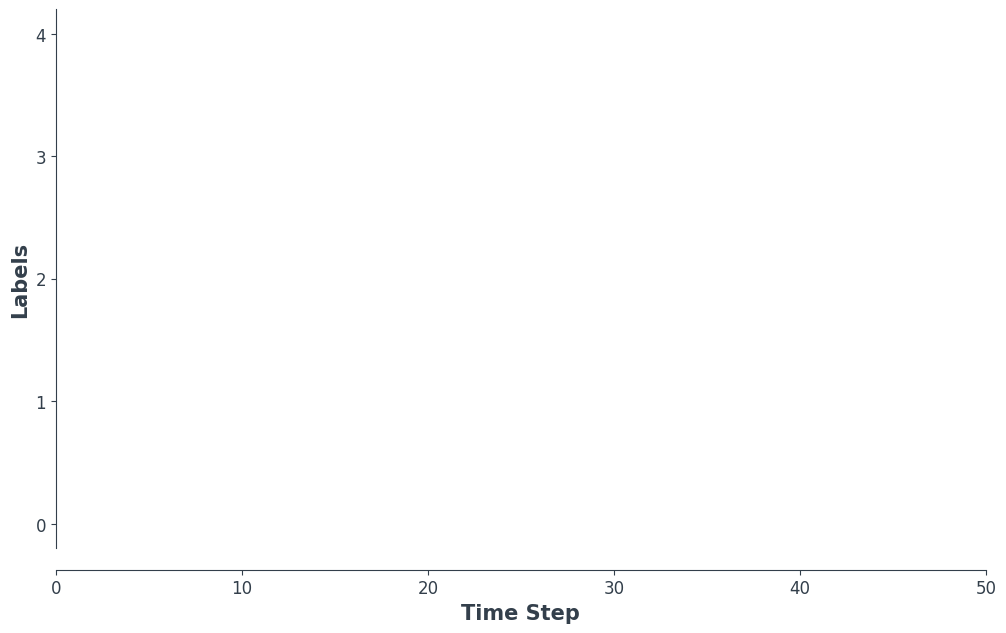

In [ ]:
from IPython.display import HTML

idx = 0

fig, ax = plt.subplots(facecolor='w', figsize=(12, 7))
labels=['0', '1', '2', '3', '4']
print(f"The target label is: {targets[idx]}")

# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

#  Plot spike count histogram
anim = splt.spike_count(spk_rec[:, idx].detach().cpu(), fig, ax, labels=labels,
                        animate=True, interpolate=1)

HTML(anim.to_html5_video())
# anim.save("spike_bar.mp4")